importing the modules that are needed

In [1]:
#import required modules
import numpy as np 
import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras import layers
keras = tf.keras

initializing variables:
class_names will store the list of names that are person and person-like this program will distinguish whether an image has a person or a person like object
class_names_label: this creates a dictionary object and assigns a numerical value to each object in the class names list
the size variable stores a global size value so each image will have the same size

In [759]:
#initialize variables
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

size = (72,72)

this function loads the dataset into variables
How the function works:
the first step is to create a list 'datasets' that will store the path of each folder we will need to access
and also create an output variable where we will store the return value of this function

The next thing to do is loop through each object in the datasets variable which this will allow us to look into each folder path that we have in our dataset variable 

we then will make 2 variables for the images and the labels 
by adding the folder path to the name of the folder we want we can find the presice path for each of the folders so what we do is we create variables directoryA and directoryIMG and in these we will store the path to the Annotations folder and the path to the JPEGImages folder respectfully 

then we can use os.listdir() to store all the files in from those folders in variables file and img 
next we can sort them so they are in the right order and each xml file corresponds to their respective image

next we need to extract the labels of each image from the xml files and the way we do that is by first finding the path to the xml and storing it in the xmlf variable by using os.path.join() and combining the path to the folder with the file 
with the path we can parse it into a element tree using ElementTree.parse(xmlf) 
then we can narrow down where the label value is stored by first looking at everything in the object tag and then looking and the value in the name tag and converting it into text then storing it in a variable 
after this we simply look through the class_names_label dictionary to find the number allocated for the specific label and then we append the number into the 'labels' list we created 
next we repeat this proccess with the images by finding which image we're on and resizing it by the global variable we created at the begining and appending it to the 'imags' list we created
then we simply loop through each file and repeat the proccess of adding it into their respective variables
then we can convert these variables into arrays using the numpy.array() function 
after this we can append both variables into the output variable and the loop through each folder 
then we can return the output variable 

In [760]:
#load dataset
def load_data():
    datasets = ['Pedestrian_Detection/Train/Train', 'Pedestrian_Detection/Test/Test', 'Pedestrian_Detection/Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = dataset +"/Annotations"
        directoryIMG = dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            curr_img = cv2.cvtColor(curr_img, cv2.COLOR_BGR2GRAY)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output

call the function and save the output into variables

In [761]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

code to choose what percentage of images to use for training data

In [745]:
train = 0.80

allImgs = []
allLabels = []

allImgs.extend(train_images)
allImgs.extend(test_images)

allLabels.extend(train_labels)
allLabels.extend(test_labels)

allImgs = np.array(allImgs, dtype='float32')
allLabels = np.array(allLabels, dtype='int32')

train = int(len(allImgs)*train)

train_images = allImgs[:train]
train_labels = allLabels[:train]

test_images = allImgs[train:]
test_labels = allLabels[train:]

this block of code simply creates a neural network model and prints out a summary of the model

In [775]:
#Defining the model
model = keras.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(72, 72, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_418 (Conv2D)         (None, 70, 70, 16)        160       
                                                                 
 conv2d_419 (Conv2D)         (None, 68, 68, 32)        4640      
                                                                 
 conv2d_420 (Conv2D)         (None, 66, 66, 64)        18496     
                                                                 
 conv2d_421 (Conv2D)         (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_536 (MaxPooli  (None, 32, 32, 128)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_537 (MaxPooli  (None, 16, 16, 128)      0         
 ng2D)                                              

In [753]:
#Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])
model.summary()

Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_156 (Flatten)       (None, 4096)              0         
                                                                 
 dense_362 (Dense)           (None, 256)               1048832   
                                                                 
 dense_363 (Dense)           (None, 256)               65792     
                                                                 
 dense_364 (Dense)           (None, 64)                16448     
                                                                 
 dense_365 (Dense)           (None, 2)                 130       
                                                                 
Total params: 1,131,202
Trainable params: 1,131,202
Non-trainable params: 0
_________________________________________________________________


then we have to compile the model and while compiling we can add metrics so the model will calculate the accuracy and the loss for us

In [776]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

the next step is to fit the model using model.fit() and passing in the training and testing data

In [782]:
FITDATA = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), callbacks = keras.callbacks.EarlyStopping(patience=0))

Epoch 1/20
30/30 [==============================] - 20s 658ms/step - loss: 0.3841 - accuracy: 0.8199 - val_loss: 0.6520 - val_accuracy: 0.7532
Epoch 2/20
30/30 [==============================] - 20s 652ms/step - loss: 0.3575 - accuracy: 0.8358 - val_loss: 0.6389 - val_accuracy: 0.7064


this function plots 3 graphs for the accuracy of the model and the loss using the matplotlib.pyplot class

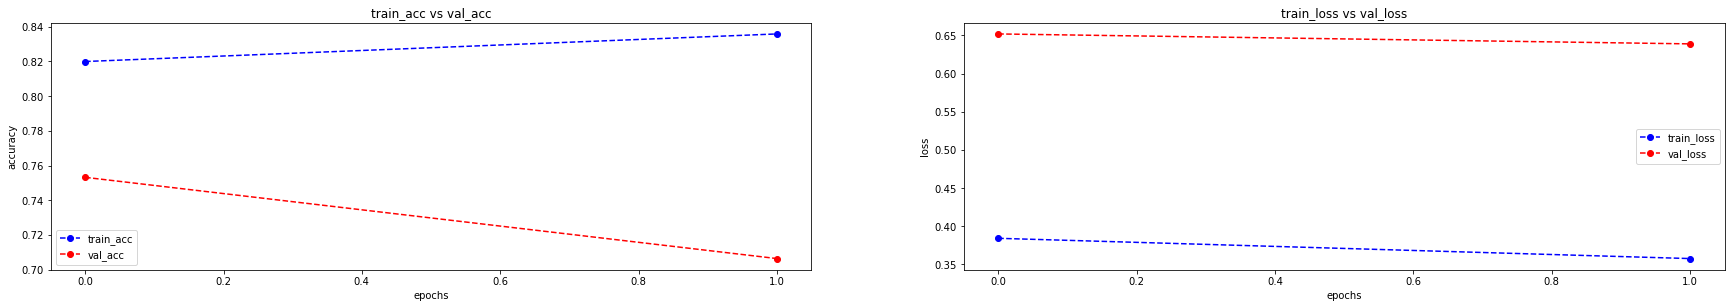

In [784]:
def plot_accuracy_loss_mse(FITDATA):

    #Plot the accuracy and the loss during the training of the nn.

    plt.figure(figsize=(30,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(FITDATA.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(FITDATA.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(FITDATA.history['loss'],'bo--', label = "train_loss")
    plt.plot(FITDATA.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

plot_accuracy_loss_mse(FITDATA)

and this code displays 36 of the models predictions 

5/5 [==============================] - 1s 109ms/step


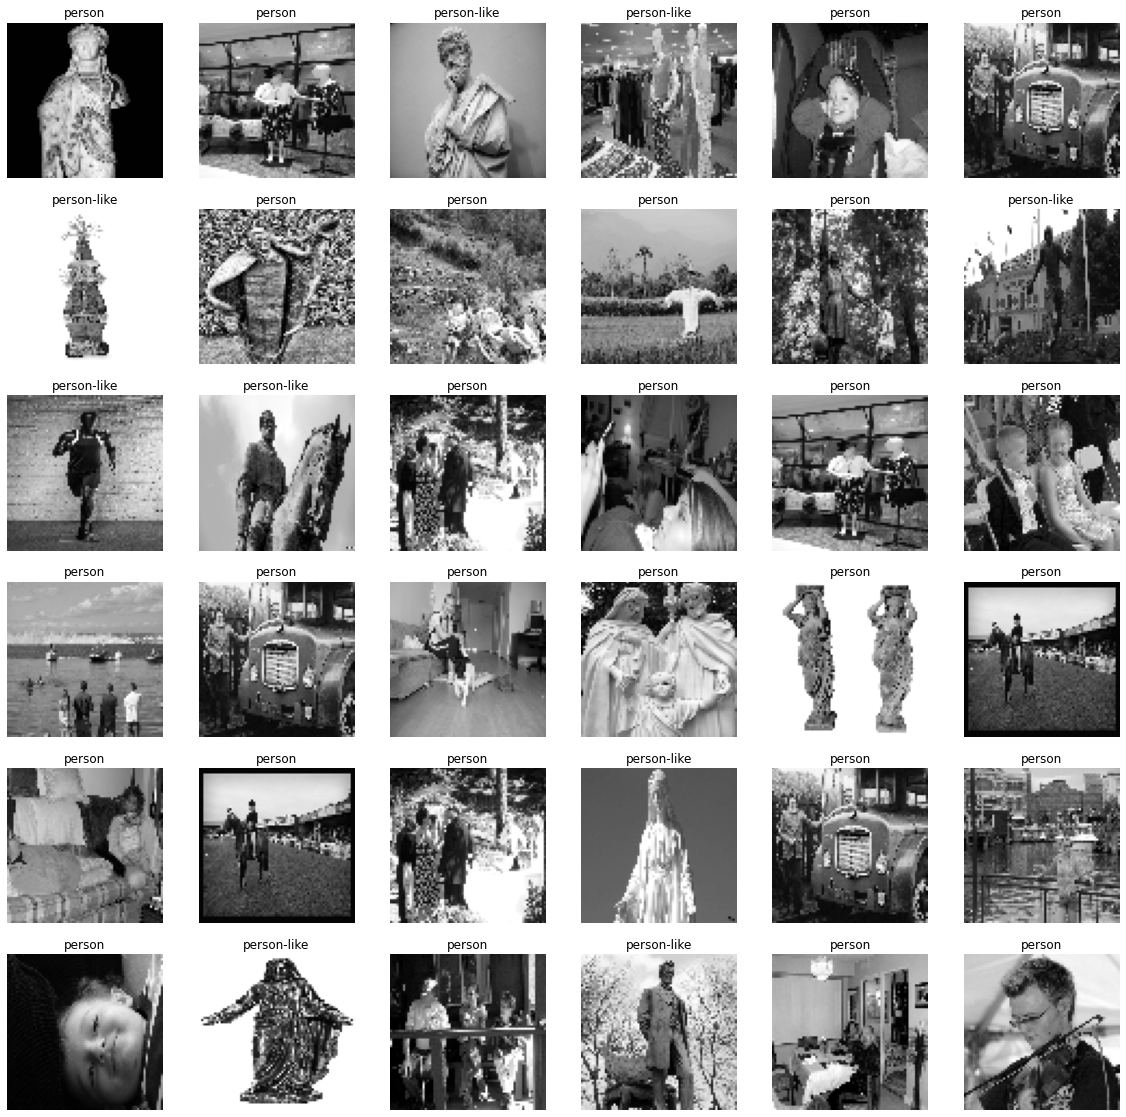

In [785]:
preds = model.predict(val_images) 

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i], cmap = 'gray')    
    plt.axis('off')
    x =np.argmax(preds[i]) # takes the maximum of of the 6 probabilites. 
    plt.title((class_names[x]))
plt.show()

prints the confusion matrix

In [742]:
result = []
for i in range(len(preds)):
    result.append(np.argmax(preds[i]))

tn, fp, fn, tp = confusion_matrix(val_labels,result).ravel()

print(tn, fp, fn, tp)

59 26 16 59


predict given image

1/1 [==============================] - 0s 126ms/step
person


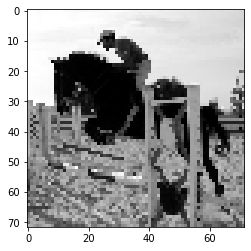

In [783]:
imag = []

img = cv2.imread('image (1).jpg')
img = cv2.resize(img, size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imag.append(img)

imag = np.array(imag, dtype='float32')
imag = imag / 255

preds = model.predict(imag) 

plt.imshow(img, cmap = 'gray')  

x =np.argmax(preds[0])
print(class_names[x])